### Analyysejä analysointiosaamisen tehtävään 2

In [1]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaavioiden tyylimäärittely
plt.style.use('seaborn-whitegrid')

# Datan avaaminen
df=pd.read_excel('https://taanila.fi/t2aineisto.xlsx')
df.head()

,Nro,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,222,Aktia Emerging Market Equity Select,0.093034,0.107643,0.008703,-0.064983,0.0130,EQ_EMER_GLOBAL
1,223,Alexandria Kehittyvät Markkinat Osinko,0.064957,0.094749,0.047500,-0.048491,0.0100,EQ_EMER_GLOBAL
2,224,"Danske Invest Global Emerging Markets, EUR",0.061523,0.116151,-0.000703,-0.092534,0.0192,EQ_EMER_GLOBAL
3,225,Danske Invest Kehitt. Osakemarkkinat,0.063977,0.091641,0.012923,-0.071588,0.0050,EQ_EMER_GLOBAL
4,226,Danske Invest SICAV Global Emerging Markets Cl...,NaN,NaN,NaN,NaN,0.0163,EQ_EMER_GLOBAL


In [2]:
# Lyhyemmät nimet muuttujille
df = df.drop(['Nro'], axis = 1)
df.columns=['nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [3]:
df['rahastoluokka'].value_counts()

EQ_EUROPE         127
EQ_NORAM           80
EQ_EMER_GLOBAL     62
EQ_FINLAND         42
Name: rahastoluokka, dtype: int64

In [4]:
#Tilastolliset tunnusluvut rahastoluokittain
df.groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       49.000000   94.000000   29.000000  61.000000
           mean         0.080142    0.091004    0.131805   0.140824
           std          0.028914    0.032111    0.028777   0.047417
           min          0.012438    0.019611    0.100188   0.024572
           25%          0.064957    0.071744    0.113892   0.111180
           50%          0.080395    0.086309    0.126872   0.151414
           75%          0.096487    0.112543    0.139578   0.162807
           max          0.123591    0.176654    0.224830   0.256680
tuotto 3v  count       56.000000  102.000000   36.000000  64.000000
           mean         0.125961    0.168016    0.236988   0.237841
           std          0.044219    0.047800    0.062480   0.055742
           min          0.040982    0.049709    0.183592   0.100948
           25%          0.102336    0.142066    0.189185   0.198277
           50%          0.120005    0.156888    0.208887   0.253485
           75%          0.150326    0.196001    0.254142   0.269428
           max          0.259487    0.295889    0.399760   0.362627
tuotto 1v  count       58.000000  120.000000   39.000000  75.000000
           mean         0.081725    0.236817    0.244176   0.333917
           std          0.108519    0.066610    0.044763   0.072507
           min         -0.112432    0.015477    0.165341   0.010013
           25%          0.009103    0.205462    0.222374   0.316814
           50%          0.045362    0.246955    0.234573   0.358098
           75%          0.152396    0.270655    0.269064   0.380166
           max          0.382945    0.443677    0.359879   0.408627
tuotto 6kk count       60.000000  120.000000   39.000000  75.000000
           mean        -0.042391    0.074256    0.042092   0.130787
           std          0.066728    0.032295    0.031026   0.044232
           min         -0.158738   -0.036867   -0.040041  -0.024170
           25%         -0.084650    0.054387    0.037716   0.119859
           50%         -0.061081    0.078856    0.043148   0.139951
           75%         -0.008703    0.091248    0.053382   0.159536
           max          0.119000    0.201161    0.114659   0.198647
palkkio    count       62.000000  127.000000   42.000000  80.000000
           mean         0.014437    0.011558    0.011599   0.011539
           std          0.006746    0.005762    0.005926   0.006093
           min          0.000000    0.000000    0.001590   0.000000
           25%          0.008125    0.007500    0.006200   0.006000
           50%          0.015000    0.011600    0.012000   0.013500
           75%          0.019000    0.017400    0.016750   0.017625
           max          0.025000    0.020000    0.020000   0.020000

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 5v'>

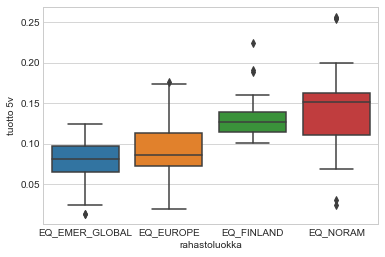

In [5]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 3v'>

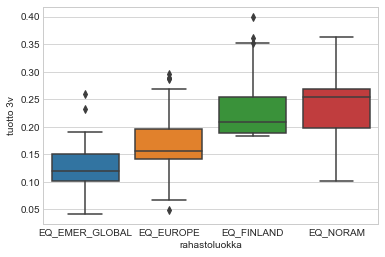

In [6]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 1v'>

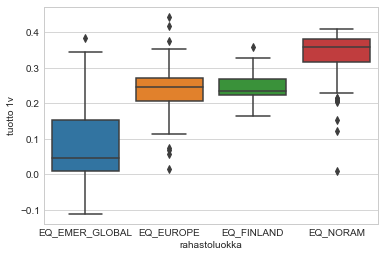

In [7]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 6kk'>

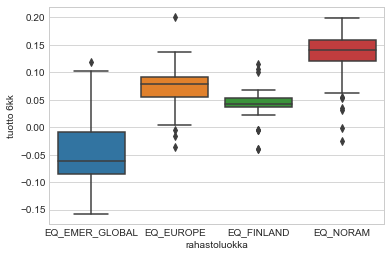

In [8]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='palkkio'>

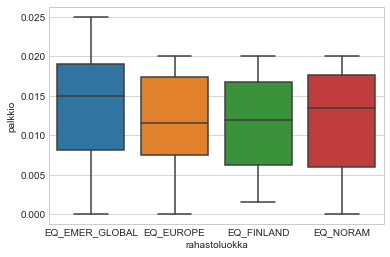

In [9]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [10]:
# Korrelaatiokertoimen 1v tuoton ja palkkion välille rahastoluokittain
df.groupby('rahastoluokka')[['tuotto 1v','palkkio']].corr()

tuotto 1v   palkkio
rahastoluokka                                
EQ_EMER_GLOBAL tuotto 1v   1.000000  0.083761
               palkkio     0.083761  1.000000
EQ_EUROPE      tuotto 1v   1.000000 -0.002943
               palkkio    -0.002943  1.000000
EQ_FINLAND     tuotto 1v   1.000000  0.086227
               palkkio     0.086227  1.000000
EQ_NORAM       tuotto 1v   1.000000 -0.280336
               palkkio    -0.280336  1.000000

In [11]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.4f' %p)

EQ_EMER_GLOBAL korrelaatio 0.084, p-arvo 0.5319
EQ_EUROPE korrelaatio -0.003, p-arvo 0.9746
EQ_FINLAND korrelaatio 0.086, p-arvo 0.6017
EQ_NORAM korrelaatio -0.280, p-arvo 0.0148


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nimi           311 non-null    object 
 1   tuotto 5v      233 non-null    float64
 2   tuotto 3v      258 non-null    float64
 3   tuotto 1v      292 non-null    float64
 4   tuotto 6kk     294 non-null    float64
 5   palkkio        311 non-null    float64
 6   rahastoluokka  311 non-null    object 
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


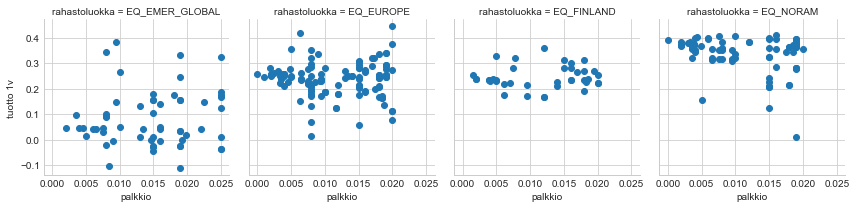

In [25]:
# 1v tuotot ja palkkiot pistekaavioina rahastoluokittain
g = sns.FacetGrid(data=df, col='rahastoluokka')
g = g.map(plt.scatter, 'palkkio', 'tuotto 1v')

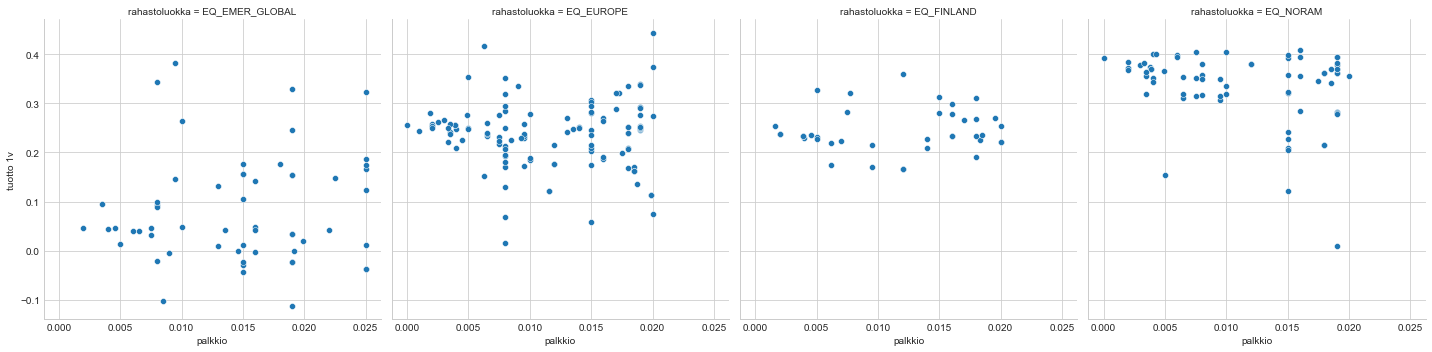

In [27]:
sns.relplot(x = 'palkkio', y = 'tuotto 1v', col = 'rahastoluokka', data = df, kind = 'scatter')